In [5]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn xgboost

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"/content/travel insurance.csv")

In [9]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [10]:
df.tail()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63
63325,JZI,Airlines,Online,Basic Plan,No,22,HONG KONG,26.0,9.10,F,35


In [11]:
df.info

<bound method DataFrame.info of       Agency    Agency Type Distribution Channel  \
0        CBH  Travel Agency              Offline   
1        CBH  Travel Agency              Offline   
2        CWT  Travel Agency               Online   
3        CWT  Travel Agency               Online   
4        CWT  Travel Agency               Online   
...      ...            ...                  ...   
63321    JZI       Airlines               Online   
63322    JZI       Airlines               Online   
63323    JZI       Airlines               Online   
63324    JZI       Airlines               Online   
63325    JZI       Airlines               Online   

                          Product Name Claim  Duration Destination  Net Sales  \
0                   Comprehensive Plan    No       186    MALAYSIA      -29.0   
1                   Comprehensive Plan    No       186    MALAYSIA      -29.0   
2      Rental Vehicle Excess Insurance    No        65   AUSTRALIA      -49.5   
3      Rental Vehic

## There are 63326 rows and 11 columns

In [12]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [13]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [14]:
df = df[df['Net Sales'] >= 0]
df.shape

(62648, 11)

In [15]:
df = df[df['Duration'] >= 0]
df.shape

(62643, 11)

In [16]:
df = df[df['Age'] >= 0]
df.shape

(62643, 11)

In [17]:
print("Total null values in Gender column: ", df['Gender'].isnull().sum())
print("Total non null values in Gender column: ", df['Gender'].notnull().sum())
gender_nulls=df.Gender.isnull().sum()/len(df.Gender)
print(f"{round(gender_nulls*100,3)} % of the data is null values for the Gender column.")

Total null values in Gender column:  44532
Total non null values in Gender column:  18111
71.089 % of the data is null values for the Gender column.


### Due to the extensive presence of missing data for the Gender column in this dataset, it is impractical to address the issue by replacing it with new data. Instead, the more viable option is to consider removing the entire column, given the disproportionately high rate of missing data and the limited dataset that remains for accurate predictions.

### Gender Column Dataset Overview:
### The Gender column exhibits a null data percentage of 71.23% (45107/63326) in the dataset. The filled data constitutes only about 28.77% (18219/63326) of the dataset.

### Another approach involves eliminating rows with missing data. However, this method may introduce an imbalanced dataset, potentially leading to bias, particularly considering the substantial amount of data that would need to be discarded.

In [18]:
df = df.drop('Gender',axis = 1)

In [19]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [20]:
df = df[df['Age'] <= 100]
df.shape

(61677, 10)

In [21]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,44
22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,25
23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,34
24,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,26
25,C2B,Airlines,Online,Annual Silver Plan,No,364,SINGAPORE,389.00,97.25,30


In [22]:
df.info

<bound method DataFrame.info of       Agency Agency Type Distribution Channel        Product Name Claim  \
21       C2B    Airlines               Online         Bronze Plan    No   
22       C2B    Airlines               Online         Bronze Plan    No   
23       C2B    Airlines               Online         Bronze Plan   Yes   
24       C2B    Airlines               Online         Silver Plan    No   
25       C2B    Airlines               Online  Annual Silver Plan    No   
...      ...         ...                  ...                 ...   ...   
63321    JZI    Airlines               Online          Basic Plan    No   
63322    JZI    Airlines               Online          Basic Plan    No   
63323    JZI    Airlines               Online          Basic Plan    No   
63324    JZI    Airlines               Online          Basic Plan    No   
63325    JZI    Airlines               Online          Basic Plan    No   

       Duration Destination  Net Sales  Commision (in value)  Age  

In [23]:
df.shape

(61677, 10)

In [24]:
df.duplicated().sum()

8245

### Checking for dublicated data(rows).
There are 8670 dublicate rows.
Droping the dublicate rows.

In [25]:
df.drop_duplicates(inplace=True)
print("Number of duplicated rows: ",df.duplicated().sum())

print("Shape of the data frame : ",df.shape)

Number of duplicated rows:  0
Shape of the data frame :  (53432, 10)


<ipython-input-26-bd5bf653c0a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1.0,vmax=1.0)


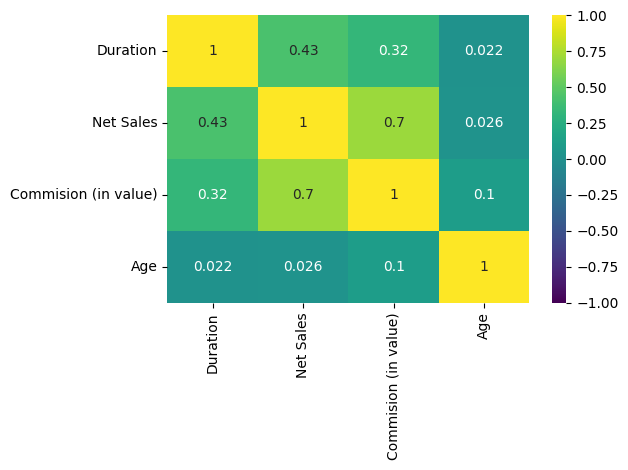

In [26]:
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1.0,vmax=1.0)
plt.tight_layout()

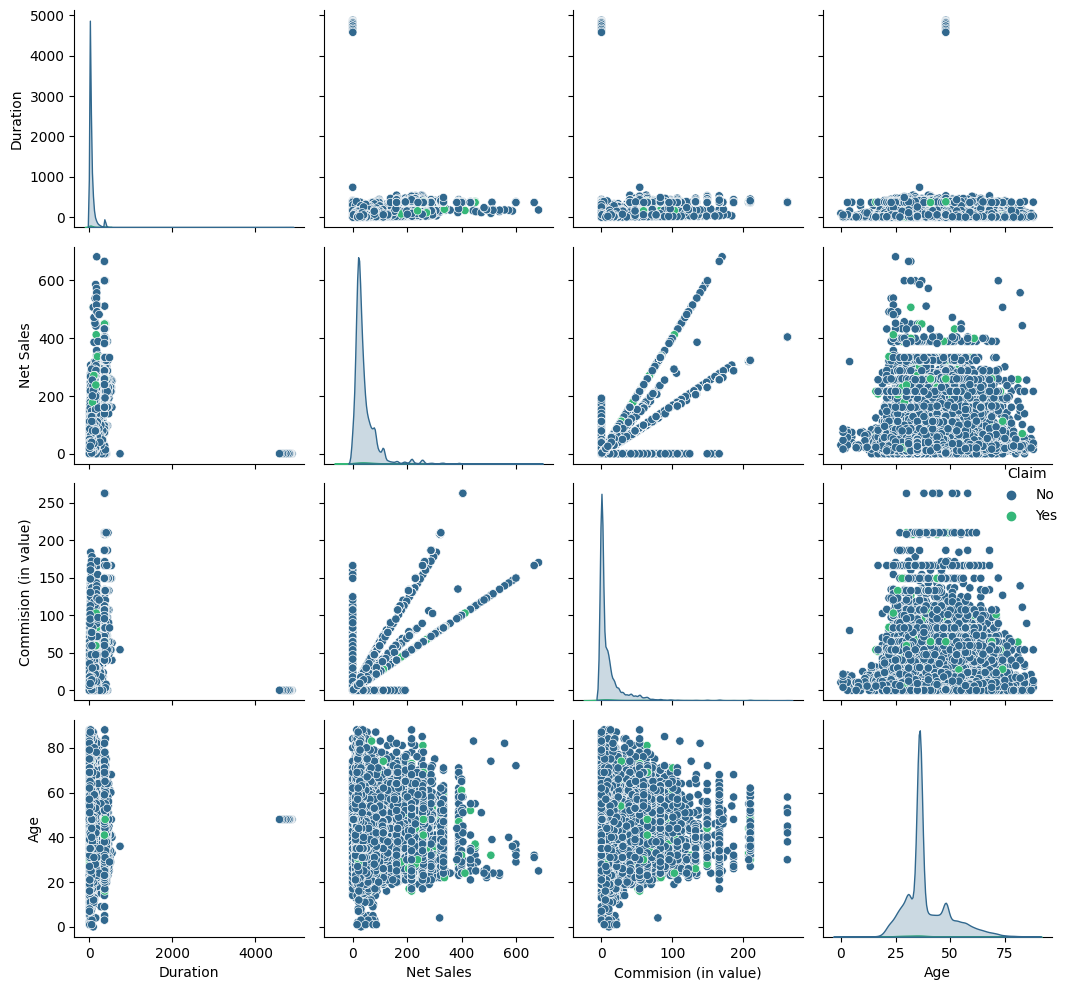

In [25]:
sns.pairplot(df,hue='Claim',palette='viridis')
plt.tight_layout();

In [27]:
from scipy.stats import probplot
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt

def apply_transform(transformer, col):
    # Applying transformation using apply function
    df[col] = df[col].apply(lambda x: transformer.fit_transform(np.array(x).reshape(-1, 1)).flatten())
    col_tf = np.array(df[col]).flatten()

In [28]:
skewed_cols = ['Duration', 'Net Sales', 'Age']

for col in skewed_cols:
    apply_transform(FunctionTransformer(lambda x: np.log1p(x)), col)

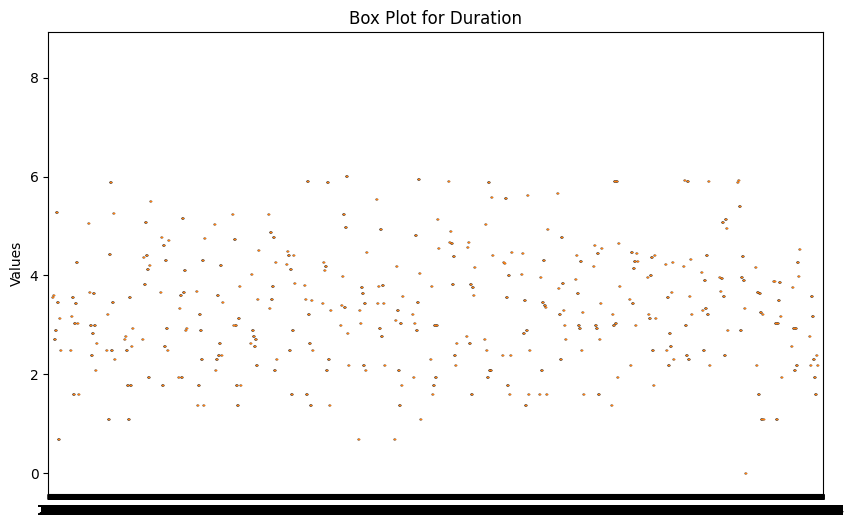

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b62783da8c0> (for post_execute):


KeyboardInterrupt: 

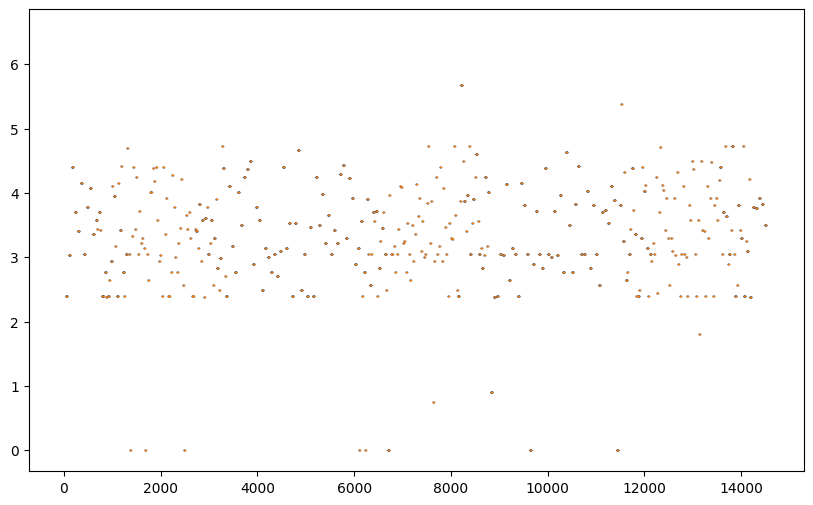

In [28]:
def BoxPlot(df, *var):
    for column in var:
        plt.figure(figsize=(10,6))
        a = df[column]
        plt.boxplot(a)
        plt.title(f'Box Plot for {column}')
        plt.ylabel('Values')
        plt.show()
BoxPlot(df,'Duration', 'Net Sales', 'Age')

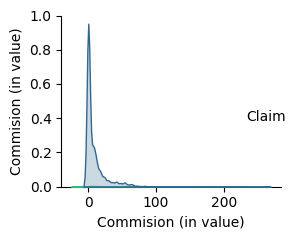

In [29]:
sns.pairplot(df,hue='Claim',palette='viridis')
plt.tight_layout();

## Checking for outliers

In [29]:
columns_to_check = ['Agency Type','Distribution Channel', 'Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [31]:
def BoxPlot(df, *var):
    for column in var:
        plt.figure(figsize=(10,6))
        a = df[column]
        plt.boxplot(a)
        plt.title(f'Box Plot for {column}')
        plt.ylabel('Values')
        plt.show()
BoxPlot(df,'Duration', 'Net Sales', 'Age')

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7e145f60e8c0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7e145f60db40> (for post_execute):


KeyboardInterrupt: 

### Square root transformation for reducing right skewness.

In [32]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
columns_to_encode = ['Duration', 'Net Sales', 'Age']
for col in columns_to_encode:
    col_tf = pt.fit_transform(df[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    df[col] = col_tf

In [ ]:
#columns_to_check = [ df['Agency'],df['Agency Type'],df['Distribution Channel'],df['Product Name'],df['Claim'],df['Duration'],df['Destination'],df['Net Sales'],df['Commision (in value)'],df['Age']]

### Remove the Outliers
### IQR

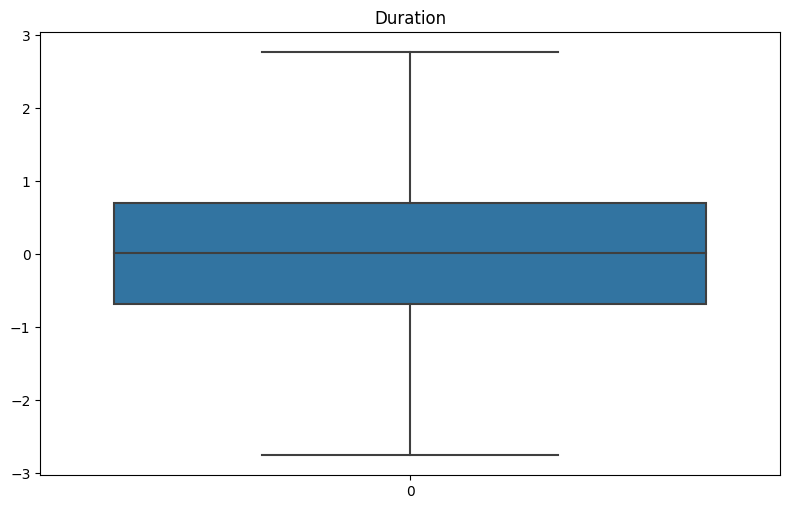

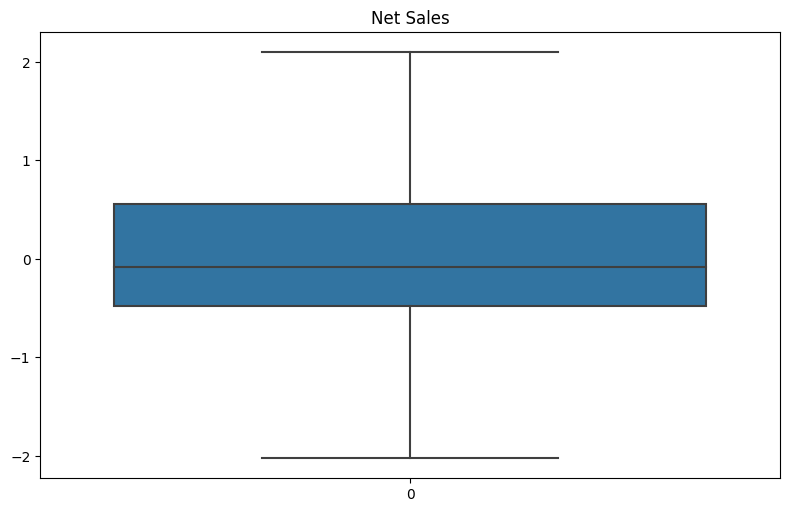

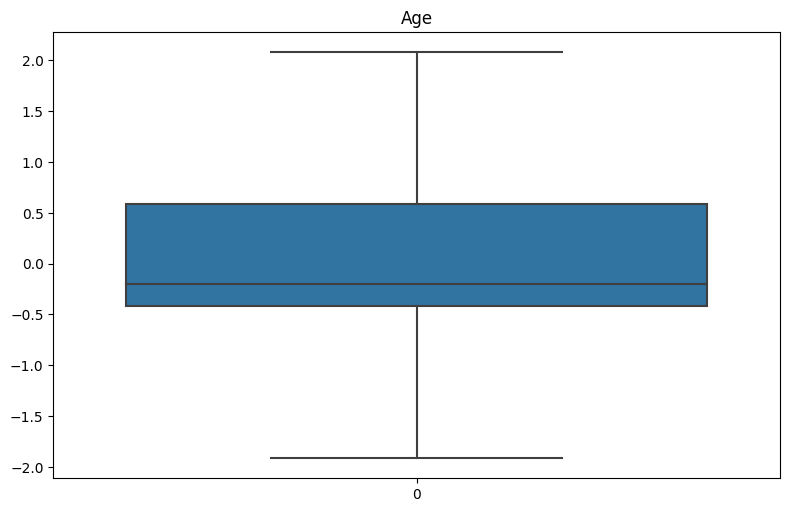

In [33]:
def treat_outliers(data,col):
    lower_limit, upper_limit = data[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return np.where(data[col]>upper_whisker,upper_whisker,np.where(data[col]<lower_whisker,lower_whisker,data[col]))

for col in skewed_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(treat_outliers(df,col))
    plt.tight_layout()
    plt.title(col)
    plt.show();

In [33]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
21,C2B,Airlines,Online,Bronze Plan,No,-0.609316,SINGAPORE,0.435506,11.54,0.581131
22,C2B,Airlines,Online,Bronze Plan,No,-1.067410,SINGAPORE,-0.594494,4.39,-1.567450
23,C2B,Airlines,Online,Bronze Plan,Yes,-0.609316,SINGAPORE,1.316357,23.50,-0.415751
24,C2B,Airlines,Online,Silver Plan,No,1.650176,SINGAPORE,2.931802,73.69,-1.422910
25,C2B,Airlines,Online,Annual Silver Plan,No,2.145366,SINGAPORE,3.359464,97.25,-0.889611


### visualizing the outliers using outliers

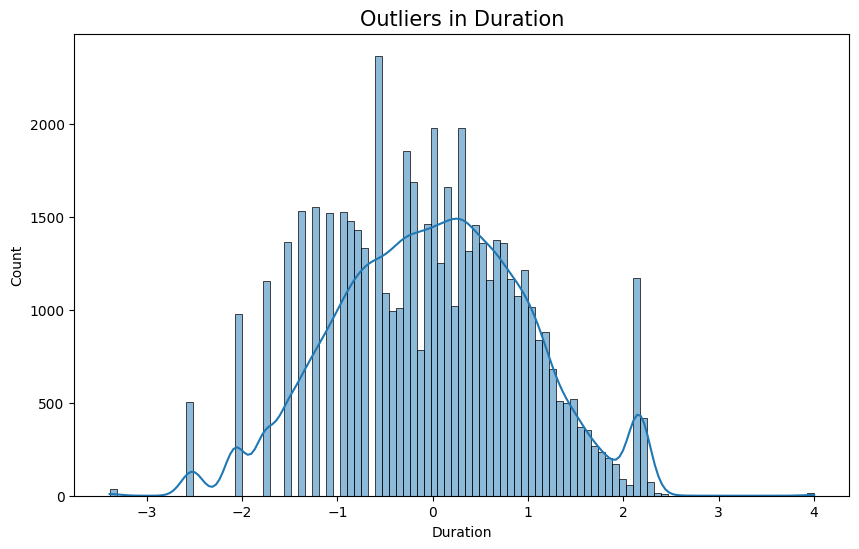

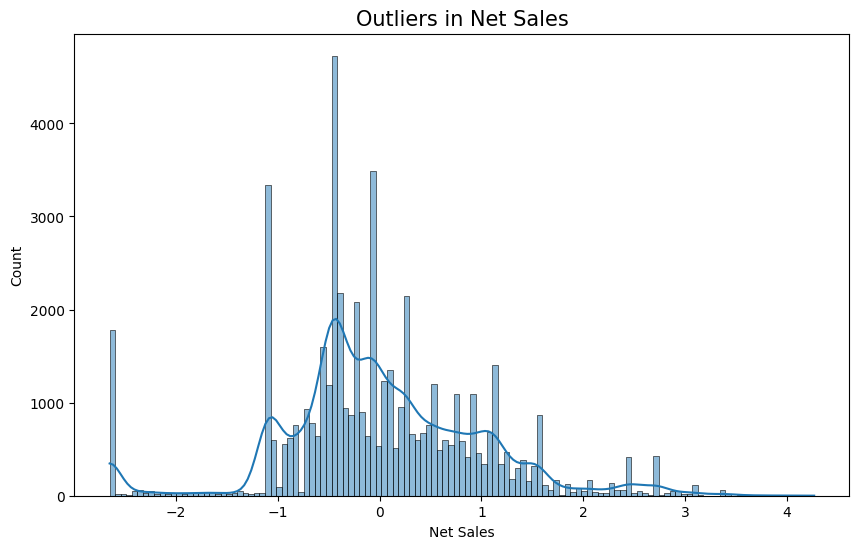

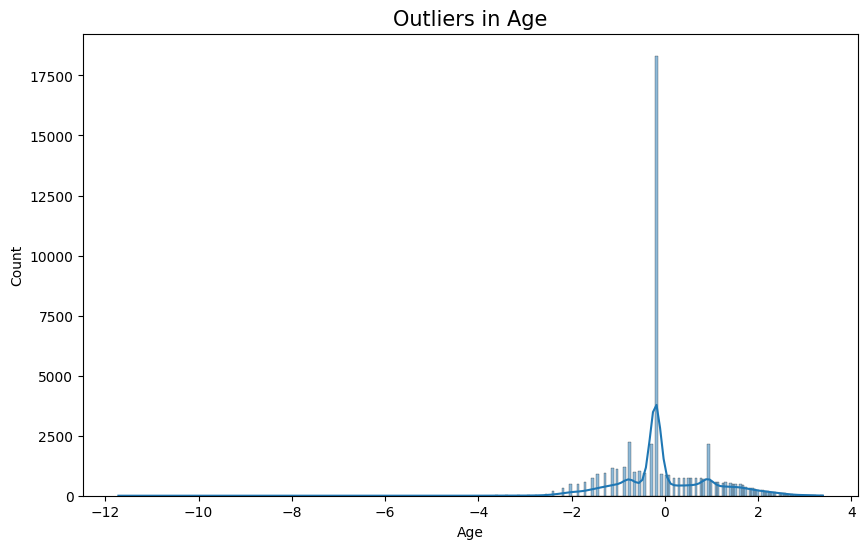

In [34]:
def displ(df, *var):
    for i in var:
        plt.figure(figsize=(10,6))
        plt.title(f'Outliers in {i}', fontsize=15)
        sns.histplot(data = df[i], kde = True)
        plt.show()
        print()
displ(df,'Duration', 'Net Sales', 'Age')

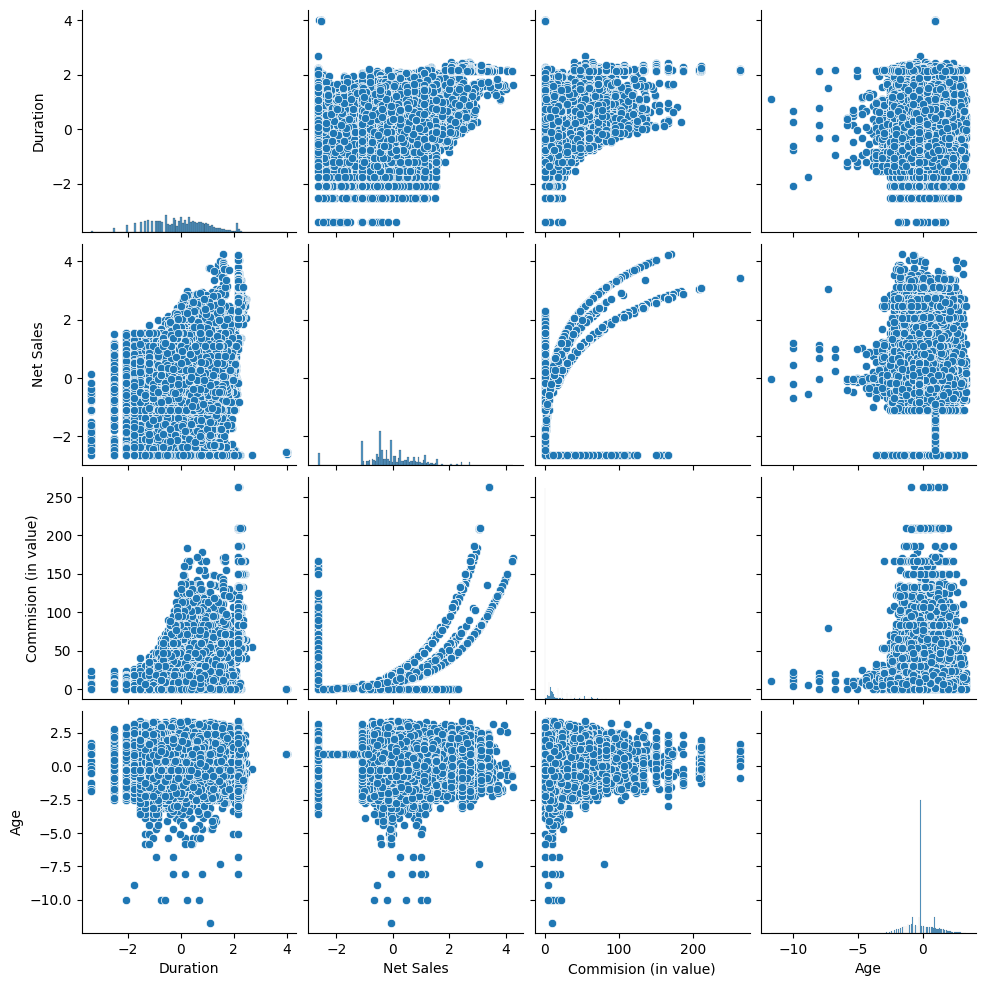

In [35]:
sns.pairplot(df)

### Label Encoding values of the columns ('Agency','Agency Type','Distribution Channel','Product Name','Claim','Destination')

In [34]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [35]:
columns_to_encode = ['Agency','Agency Type','Distribution Channel','Product Name','Claim','Destination']

In [38]:
for column in df:
    print(f'Unique values in {column}: {df[column].unique()}')
    print('\n\n')

Unique values in Agency: ['C2B' 'CWT' 'EPX' 'RAB' 'SSI' 'JZI' 'ART' 'CSR' 'CBH' 'KML' 'CCR' 'ADM'
 'LWC' 'TTW' 'TST']



Unique values in Agency Type: ['Airlines' 'Travel Agency']



Unique values in Distribution Channel: ['Online' 'Offline']



Unique values in Product Name: ['Bronze Plan' 'Silver Plan' 'Annual Silver Plan'
 'Rental Vehicle Excess Insurance' '2 way Comprehensive Plan'
 'Cancellation Plan' '1 way Comprehensive Plan' 'Value Plan'
 'Ticket Protector' 'Basic Plan' '24 Protect' 'Gold Plan'
 'Comprehensive Plan' 'Annual Gold Plan' 'Premier Plan'
 'Single Trip Travel Protect Silver' 'Individual Comprehensive Plan'
 'Spouse or Parents Comprehensive Plan' 'Annual Travel Protect Silver'
 'Single Trip Travel Protect Platinum' 'Annual Travel Protect Gold'
 'Single Trip Travel Protect Gold' 'Annual Travel Protect Platinum'
 'Child Comprehensive Plan' 'Travel Cruise Protect'
 'Travel Cruise Protect Family']



Unique values in Claim: ['No' 'Yes']



Unique values in Duration: [-0.6

In [36]:
from sklearn.preprocessing import OrdinalEncoder

agency_type_encoder = OrdinalEncoder(categories=[['Airlines','Travel Agency']])
df['Agency Type'] = agency_type_encoder.fit_transform(df[['Agency Type']])
df['Agency Type'] = df['Agency Type'].astype(int)
df['Agency Type'].unique()

array([0, 1])

In [37]:
distribution_chn_encoder = OrdinalEncoder(categories=[['Offline','Online']])
df['Distribution Channel'] = distribution_chn_encoder.fit_transform(df[['Distribution Channel']])
df['Distribution Channel'] = df['Distribution Channel'].astype(int)

In [38]:
df['Commision (in value)'] = df['Commision (in value)'].astype(int)

In [39]:
df['Commision (in value)'].describe()

count    53432.000000
mean        10.084893
std         20.356864
min          0.000000
25%          0.000000
50%          0.000000
75%         11.000000
max        262.000000
Name: Commision (in value), dtype: float64

In [40]:
def Commission(value):
    if value >= 0 and value <= 87:
        return "Low"
    elif value > 87 and value <= 174:
        return "Medium"
    else:
        return "High"

df['Commision (in value)'] = df['Commision (in value)'].apply(Commission)
df['Commision (in value)'].value_counts()

Low       52825
Medium      538
High         69
Name: Commision (in value), dtype: int64

In [41]:
df['Commision (in value)'] = df['Commision (in value)'].astype(object)
commission_encoder = OrdinalEncoder(categories=[['Low','Medium','High']])
df['Commision (in value)'] = commission_encoder.fit_transform(df[['Commision (in value)']])
df['Commision (in value)'] = df['Commision (in value)'].astype(int)

In [42]:
df_encoded = df.copy()
product_encoder = OneHotEncoder(sparse=False)

products_encoded = product_encoder.fit_transform(df[['Product Name']])
products_encoded_df = pd.DataFrame(products_encoded, columns=product_encoder.get_feature_names_out(['Product Name']))
df_encoded = pd.concat([df_encoded, products_encoded_df], axis=1)

df_encoded = df_encoded.drop(['Product Name'], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
counts = df['Destination'].value_counts()
counts

SINGAPORE                 11141
THAILAND                   5012
MALAYSIA                   4266
CHINA                      3896
AUSTRALIA                  3338
                          ...  
MOLDOVA, REPUBLIC OF          1
GUADELOUPE                    1
NEW CALEDONIA                 1
ARMENIA                       1
BOSNIA AND HERZEGOVINA        1
Name: Destination, Length: 147, dtype: int64

In [44]:
threshold = 1000
remaining_cat = counts[counts <= threshold].index
destinations_encoded = pd.get_dummies(df['Destination'].replace(remaining_cat,'Uncommon'),drop_first=True,dtype=int,sparse=False)
destinations_encoded.sample(10)

,CHINA,HONG KONG,INDIA,INDONESIA,JAPAN,"KOREA, REPUBLIC OF",MALAYSIA,PHILIPPINES,SINGAPORE,"TAIWAN, PROVINCE OF CHINA",THAILAND,UNITED KINGDOM,UNITED STATES,Uncommon,VIET NAM
30130,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
47439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54887,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
34439,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9852,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48895,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
47843,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
42958,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60674,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25013,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
agency_encoder = OneHotEncoder(variables=['Agency'],drop_last=True)
agencies_encoded = agency_encoder.fit_transform(df[['Agency']])
agencies_encoded.sample(10)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'variables'

In [45]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Claim']= label_encoder.fit_transform(df['Claim'])

In [46]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
21,C2B,0,1,Bronze Plan,0,-0.609316,SINGAPORE,0.435506,0,0.581131
22,C2B,0,1,Bronze Plan,0,-1.067410,SINGAPORE,-0.594494,0,-1.567450
23,C2B,0,1,Bronze Plan,1,-0.609316,SINGAPORE,1.316357,0,-0.415751
24,C2B,0,1,Silver Plan,0,1.650176,SINGAPORE,2.931802,0,-1.422910
25,C2B,0,1,Annual Silver Plan,0,2.145366,SINGAPORE,3.359464,1,-0.889611


In [47]:
label_encoder = LabelEncoder()
columns_to_encode = ['Agency', 'Product Name','Destination']
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [52]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
21,2,0,1,9,0,-0.609316,117,0.435506,0,0.581131
22,2,0,1,9,0,-1.067410,117,-0.594494,0,-1.567450
23,2,0,1,9,1,-0.609316,117,1.316357,0,-0.415751
24,2,0,1,17,0,1.650176,117,2.931802,0,-1.422910
25,2,0,1,4,0,2.145366,117,3.359464,1,-0.889611


In [53]:
df.describe()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
count,53432.000000,53432.000000,53432.000000,53432.000000,53432.000000,5.343200e+04,53432.000000,5.343200e+04,53432.000000,5.343200e+04
mean,6.460286,0.718315,0.982632,9.277268,0.016937,-8.032037e-17,84.942993,-1.505342e-16,0.012652,6.532014e-16
std,2.211106,0.449825,0.130639,6.460171,0.129038,1.000009e+00,42.086164,1.000009e+00,0.122778,1.000009e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3.390599e+00,0.000000,-2.649251e+00,0.000000,-1.172065e+01
25%,6.000000,0.000000,1.000000,1.000000,0.000000,-6.834491e-01,56.000000,-4.771169e-01,0.000000,-4.157513e-01
50%,7.000000,1.000000,1.000000,10.000000,0.000000,1.275611e-02,92.000000,-8.450850e-02,0.000000,-1.971229e-01
75%,7.000000,1.000000,1.000000,16.000000,0.000000,6.950838e-01,117.000000,5.531748e-01,0.000000,5.811315e-01
max,14.000000,1.000000,1.000000,25.000000,1.000000,4.001269e+00,146.000000,4.265778e+00,2.000000,3.387801e+00


## Model Training

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import xgboost as xgb

In [49]:
df['Claim'].unique()

array([0, 1])

In [50]:
df['Claim'].value_counts()

0    52527
1      905
Name: Claim, dtype: int64

In [51]:
X = df.drop(['Claim'], axis=1).values
y = df['Claim'].values

In [52]:
Smote

NameError: name 'Smote' is not defined

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X, y = oversampler.fit_resample(X_train, y_train)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=101)

In [55]:
X_train

array([[ 7.        ,  1.        ,  1.        , ...,  0.31938197,
         0.        , -0.19712291],
       [ 2.        ,  0.        ,  1.        , ..., -0.26336867,
         0.        ,  1.15006268],
       [ 2.        ,  0.        ,  1.        , ...,  0.97333206,
         0.        , -0.50405544],
       ...,
       [ 7.        ,  1.        ,  1.        , ...,  0.91015476,
         0.        , -0.19712291],
       [ 8.        ,  0.        ,  1.        , ..., -0.43056743,
         0.        ,  0.28759477],
       [ 7.        ,  1.        ,  1.        , ...,  0.22005023,
         0.        , -0.19712291]])

In [56]:
X_test

array([[ 7.93390937,  0.06609063,  1.        , ..., -0.19246479,
         0.        ,  0.77189375],
       [ 8.        ,  0.        ,  1.        , ..., -0.57013176,
         0.        ,  1.16396835],
       [ 2.        ,  0.        ,  1.        , ..., -0.58099516,
         0.        ,  0.5648314 ],
       ...,
       [ 7.        ,  1.        ,  1.        , ...,  1.54834868,
         0.        , -0.19712291],
       [ 2.        ,  0.        ,  1.        , ...,  0.87722789,
         0.        ,  2.50000777],
       [ 7.        ,  1.        ,  1.        , ..., -1.09726832,
         0.        , -0.30504759]])

In [62]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
y_test

array([1, 0, 1, ..., 0, 1, 0])

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
y

array([0, 0, 0, ..., 1, 1, 1])

## Gradient Boosting

In [58]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_classifier.fit(X_train_scaled, y_train)
y_pred = gb_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: ",accuracy)

Accuracy:  0.8399825507614214


## Building the Model

## Models used to predict :

0.Gradient Boosting Classifier

1.LogisticRegression

2.KNeighborsClassifier

3.DecisionTreeClassifier

4.RandomForest Classifier

5.Support Vector Classification (SVC)

6.Naive Bayes

7.xgboost

8.Stochastic gradient descent

9.LinearSVC

10.MultinomialNB

11.Extra Trees Classifier

In [66]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_classifier.fit(X_train_scaled, y_train)
y_pred = gb_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: ",accuracy)

Accuracy:  0.8417274746192893


In [59]:
models=[0]*12

models[0] = LogisticRegression()
models[1] = KNeighborsClassifier()
models[2] = DecisionTreeClassifier()
models[3] = RandomForestClassifier()
models[4] = ExtraTreesClassifier()
models[5] = SVC()
models[6] = GaussianNB()
models[7] = xgb.XGBClassifier()
models[8] = SGDClassifier()
models[9] = LinearSVC()
models[10] = BernoulliNB()
models[11] = ExtraTreesClassifier()

In [60]:
models

[LogisticRegression(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 ExtraTreesClassifier(),
 SVC(),
 GaussianNB(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 SGDClassifier(),
 LinearSVC(),
 BernoulliNB(),
 ExtraTreesClassifier()]

In [61]:
def check():
    for m in models:
        model=m
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print('Model Name: ',m)
        print("Accuracy score is: ",accuracy_score(y_test,y_pred)*100)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()

In [62]:
check()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Name:  LogisticRegression()
Accuracy score is:  73.46526015228426
[[10045  2492]
 [ 4199  8480]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     12537
           1       0.77      0.67      0.72     12679

    accuracy                           0.73     25216
   macro avg       0.74      0.74      0.73     25216
weighted avg       0.74      0.73      0.73     25216


Model Name:  KNeighborsClassifier()
Accuracy score is:  92.75460025380711
[[11004  1533]
 [  294 12385]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     12537
           1       0.89      0.98      0.93     12679

    accuracy                           0.93     25216
   macro avg       0.93      0.93      0.93     25216
weighted avg       0.93      0.93      0.93     25216


Model Name:  DecisionTreeClassifier()
Accuracy score is:  95.29663705583756
[[11913   624]
 [  562 12117]]
              precision    re

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Name:  LinearSVC()
Accuracy score is:  50.55520304568528
[[12438    99]
 [12369   310]]
              precision    recall  f1-score   support

           0       0.50      0.99      0.67     12537
           1       0.76      0.02      0.05     12679

    accuracy                           0.51     25216
   macro avg       0.63      0.51      0.36     25216
weighted avg       0.63      0.51      0.36     25216


Model Name:  BernoulliNB()
Accuracy score is:  66.4934961928934
[[8150 4387]
 [4062 8617]]
              precision    recall  f1-score   support

           0       0.67      0.65      0.66     12537
           1       0.66      0.68      0.67     12679

    accuracy                           0.66     25216
   macro avg       0.67      0.66      0.66     25216
weighted avg       0.66      0.66      0.66     25216


Model Name:  ExtraTreesClassifier()
Accuracy score is:  96.55774111675127
[[11940   597]
 [  271 12408]]
              precision    recall  f1-score   support


In [63]:
for model in models:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print("\n",model)
    print(accuracy_train)
    print(accuracy_test)


 LogisticRegression()
0.7358589978924468
0.7346526015228426

 KNeighborsClassifier()
0.9450506492623564
0.9275460025380711

 DecisionTreeClassifier()
0.999252158542389
0.9529663705583756

 RandomForestClassifier()
0.999252158542389
0.9666878172588832

 ExtraTreesClassifier()
0.999252158542389
0.9659739847715736

 SVC()
0.7263070229111428
0.7225571065989848

 GaussianNB()
0.7312189815759059
0.726998730964467

 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=Non

## Cross Validating

In [75]:
from sklearn.model_selection import cross_val_score

for m in models:
    scores = cross_val_score(m, X_train, y_train, cv=10)*100
    print('Model Name: ',m)
    print('Cross-Validation Accuracy Scores', scores)
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model Name:  LogisticRegression()
Cross-Validation Accuracy Scores [73.09653297 74.7960571  74.32019035 74.49014276 72.97756628 73.94629504
 73.95886452 73.36392997 73.07496175 73.00696923]

Model Name:  KNeighborsClassifier()
Cross-Validation Accuracy Scores [92.3521414  92.09721278 92.25016995 91.62134602 91.7743032  91.89326988
 91.75590685 91.77290498 92.02787693 91.80690124]

Model Name:  DecisionTreeClassifier()
Cross-Validation Accuracy Scores [95.59823249 94.79945615 95.47926581 95.15635622 94.96940857 95.08837525
 95.35951045 94.96855346 95.13853476 94.69658338]

Model Name:  RandomForestClassifier()
Cross-Validation Accuracy Scores [96.87287559 96.54996601 96.68592794 96.56696125 96.53297077 96.60095173
 96.88934217 96.26041135 96.61737209 96.36240014]

Model Name:  ExtraTreesClassifier()
Cross-Validation Accuracy Scores [96.80489463 96.24405167 96.26104691 96.07409925 96.4649898  96.48198504
 96.32840388 96.02243753 96.26041135 95.76746558]

Model Name:  SVC()
Cross-Validati

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Name:  LinearSVC()
Cross-Validation Accuracy Scores [65.41468389 50.22093814 65.2957172  53.24609109 50.67980965 59.24541128
 59.0345062  52.3372429  60.05439402 59.93540711]

Model Name:  BernoulliNB()
Cross-Validation Accuracy Scores [66.70632223 66.14547927 68.16791298 66.67233175 66.02651258 67.01223657
 66.6836648  66.59867415 67.04062553 65.5617882 ]

Model Name:  ExtraTreesClassifier()
Cross-Validation Accuracy Scores [96.78789939 96.39700884 96.1760707  95.95513256 96.41400408 96.3800136
 96.29440762 96.20941696 96.20941696 95.46149924]



## Hyperparameter Tunning

In [76]:
best_models = [0] * 12

param_grid = {
    0: {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    1: {'n_neighbors': [3, 5, 7, 9]},
    2: {'max_depth': [None, 10, 20, 30]},
    3: {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    4: {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    5: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']},
    6: {},
    7: {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    8: {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
    9: {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    10: {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
    11: {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
}

In [ ]:
from sklearn.model_selection import GridSearchCV

for i in range(12):
    model = models[i]
    parameters = param_grid[i]

    if i == 7:
        model = xgb.XGBClassifier()
        grid_search = GridSearchCV(model, parameters, scoring='accuracy', cv=5)
    else:
        grid_search = GridSearchCV(model, parameters, scoring='accuracy', cv=5)

    grid_search.fit(X_train, y_train)
    best_models[i] = grid_search.best_estimator_

    print(f"Best parameters for Model {i}: {grid_search.best_params_}")
    print(f"Best accuracy for Model {i}: {grid_search.best_score_}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Model 0: {'C': 0.001}
Best accuracy for Model 0: 0.7378645325446379

Best parameters for Model 1: {'n_neighbors': 3}
Best accuracy for Model 1: 0.9255897480174914

Best parameters for Model 2: {'max_depth': None}
Best accuracy for Model 2: 0.9479400314525345

Best parameters for Model 3: {'max_depth': None, 'n_estimators': 200}
Best accuracy for Model 3: 0.9631007919635142

Best parameters for Model 4: {'max_depth': None, 'n_estimators': 200}
Best accuracy for Model 4: 0.960568314688493



In [ ]:
from sklearn.metrics import accuracy_score

for i in range(12):
    model = best_models[i]  # Use the tuned model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for Model {i}: {accuracy}")

Accuracy for Model 0: 0.7394114847715736
Accuracy for Model 1: 0.9355567893401016
Accuracy for Model 2: 0.9547112944162437
Accuracy for Model 3: 0.9670447335025381
Accuracy for Model 4: 0.9649032360406091


AttributeError: 'int' object has no attribute 'predict'

In [1]:
!pip install scikit-learn

from sklearn.metrics import roc_curve, roc_auc_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


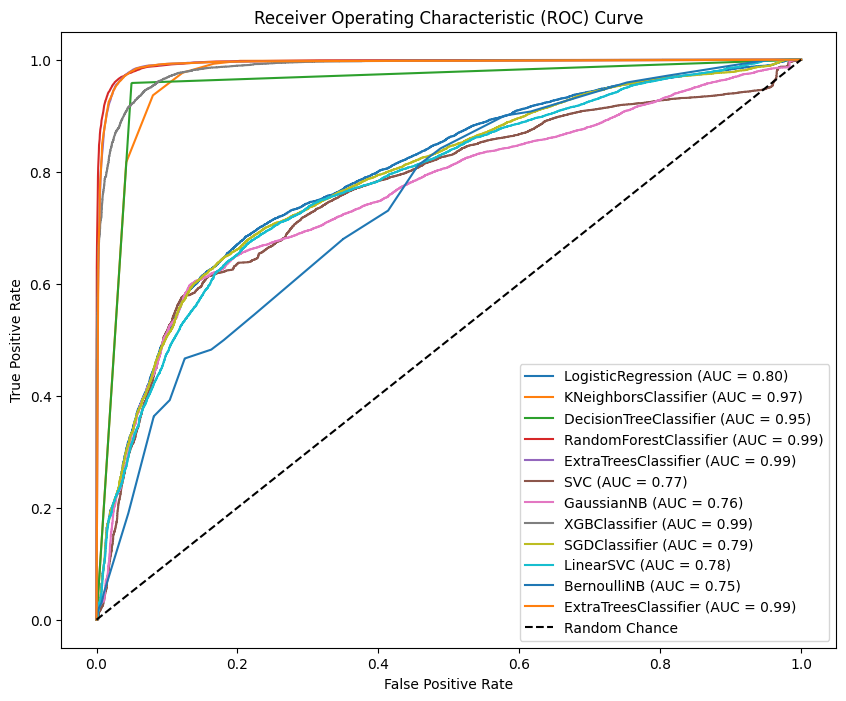

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

for model in models:
    model_name = model.__class__.__name__

    model.fit(X_train, y_train)

    # Check if the model has predict_proba method
    if hasattr(model, "predict_proba"):
        # Get predicted probabilities
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        # For models that do not have predict_proba, use decision function
        y_probs = model.decision_function(X_test)

    # Calculate ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [67]:
import pickle

file = open('Travel Insurance', 'wb')
pickle.dump(df, file)
file.close()